In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

**Encoding**

- Encoding means convert categorical columns data to Numerical data
- Because ML models Expert the data should be in Numerical format
- ML models developed by Math algorithms
- It is very very important to apply encoding
- The following methods are
  - map
  - np.where
  - one hot encoding
  - label Encoder

**Map**

- map is one method to convert categorical values to numerical
- Take one categorical column
- Get the unique labels first
- make a dictionary with assign a number to each label
- for example case_status has two lwbwlws
  - Certified
  - Denied
- Assign 0 to Certified, 1 to Denied
- Create a dictionary labels as keys, number as values only
- {'Certified':0, 'Denied':1}


In [ ]:
# Step-1: Read the column
# Step-2: Get the unique values
# Step-3: MAke a dictionary
# Step-4: Apply the map

In [ ]:
visa_df['case_status'].unique()

array(['Denied', 'Certified'], dtype=object)

In [ ]:
d={'Certified':0,'Denied':1}
visa_df['case_status_new']=visa_df['case_status'].map(d)

In [ ]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0


In [ ]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [ ]:
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

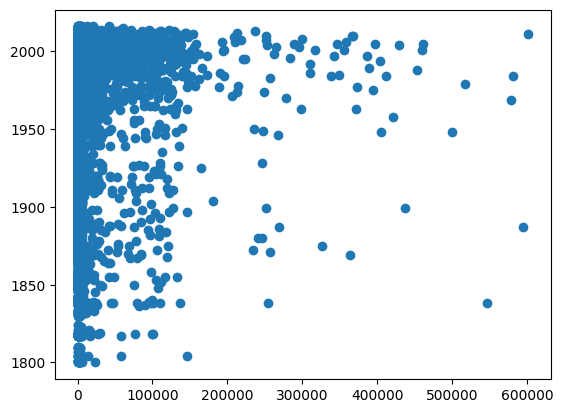

In [ ]:
col1 = visa_df['no_of_employees']
cols2 = visa_df['yr_of_estab']
plt.scatter(col1, cols2)

In [ ]:
# I want to apply the map method for all categorical columns
# Step-1: we need to get unique labels
# Step-2: we need to get a numbers = len unique labels
# Step-3: we need to create a dictionary

In [ ]:
unique_labels = visa_df['case_status'].unique()
list1 = [i for i in range(len(unique_labels))]
unique_labels, list1

(array(['Denied', 'Certified'], dtype=object), [0, 1])

In [ ]:
unique_labels = sorted(visa_df['case_status'].unique())
list1 = [i for i in range(len(unique_labels))]
dict1 = dict(zip(unique_labels, list1))
dict1

{'Certified': 0, 'Denied': 1}

In [ ]:
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")
unique_labels = sorted(visa_df['case_status'].unique())
list1 = [i for i in range(len(unique_labels))]
dict1 = dict(zip(unique_labels, list1))
dict1
visa_df['case_status_new']=visa_df['case_status'].map(dict1)
visa_df

# we can use old case_status there is no need to create a new column so that it will overwrite & updated the old column itself.

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0


In [ ]:
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")
cat_columns=visa_df.select_dtypes(include='object').columns

for i in cat_columns:
  unique_labels = sorted(visa_df[i].unique())
  list1 = [i for i in range(len(unique_labels))]
  dict1 = dict(zip(unique_labels, list1))
  dict1
  visa_df['case_status_new']=visa_df[i].map(dict1)
visa_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0


**LabelEncoder**

- LabelEncoder is a method to convert categorical data to Numerical data

- LabelEncoder is a same way, how we did in the above
- The for loop map method we wxplored
- But the LabelEncoder alse do the same
- It is under **sickit-learn** we usually called as **sklearn**
- Under sklearn we have class called as preprocessing
- Because currently we are doing data preprocessing only
- Under preprocessing class we have a method called as **LabelEncoder**
- sklearn
  - preprocessing
    - LabelEncoder

- Any sklearn package has 3 step
  - Step-1: Read the package
  - Step-2: Save the package
  - Step-3: Apply fit transform on data

In [ ]:
# Read the data
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")

In [ ]:
# Step-1: Read the package / Load the method
from sklearn.preprocessing import LabelEncoder
# Step-2: Save the package
le = LabelEncoder()
# Step-3: Apply fit transform on data
visa_df['case_status']=le.fit_transform(visa_df['case_status'])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


In [ ]:
# Read the data
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")

In [ ]:
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_columns=visa_df.select_dtypes(include='object').columns
le = LabelEncoder()
for i in cat_columns:
  visa_df[i]= le.fit_transform(visa_df[i])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


**fit and transform**

- for means develop the logic
- transform means process the logic
- if we observe in map method forst we developed dictionary logic
- the we apply that dictionary to column
- Developing the dictionary is kind of fit
- apply the dictionary to column means we are transforming the data cat to num
- whenever we are transforming or changing the data then use **fit transform**
- if we are not  changing the data then only **fit**

**np.where**

- using np.where also we can change the Categorical data to Numerical
- But np.where is only for Binary condition
- np.where is same as if-else
- if condition is True : will apply True value
- if codition is False : will apply False value
- so np.where use for only binary labels
- A column should have only two unique labels

In [ ]:
# value == 'certified' replace with 0
# otherwise 1
np.where(con, 0, 1)

In [ ]:
# Read the data
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")

In [ ]:
np.where(visa_df['case_status']=='Certified', 0, 1)

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
visa_df = pd.read_excel(r"/content/drive/MyDrive/Visadataset.xlsx")
con = visa_df['case_status']=='Certified'
visa_df['case_status']=np.where(con, 0, 1)
visa_df
# this np.where is used only for the binary values

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


**One hot encoder**

- One hot means if one will be ON, another will be OFF
- ON reprewsents with 1
- Off represents with 0
- For example case status has two unique labels
  - Certified
  - Denied
- One hot encoder creates new columns which is equal to number of unique labels
- For example case status will create two new extra columns
  - case_status_Certified
  - case_status_Denied

case_status   case_status_Certifed    case_status_denied

|-|-|-|

Denied|0|1

Certified|1|0

Denied|0|1  